# Network Compression using SVD

In [14]:
#Import Required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load training data

In [15]:
# training data
#prepare dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trainX, trainY, testX, testY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Network Architecture:

5 hidden layers with 1025 units in each.

In [16]:
tf.reset_default_graph()  
input_units = 784
hidden_units = 1024
output_units = 10

#input placeholder
x = tf.placeholder(tf.float32, [None,784])

#hidden layers 1-5
w1 = tf.get_variable("W1", shape=[input_units, hidden_units], initializer=tf.initializers.he_normal())
b1 = tf.get_variable("b1", shape=[1,hidden_units], initializer=tf.initializers.he_normal())

h1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.get_variable("W2", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b2 = tf.get_variable("b2", shape=[1,hidden_units], initializer=tf.initializers.he_normal())

h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)

w3 = tf.get_variable("W3", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b3 = tf.get_variable("b3", shape=[1,hidden_units], initializer=tf.initializers.he_normal())

h3 = tf.nn.relu(tf.matmul(h2, w3) + b3)

w4 = tf.get_variable("W4", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b4 = tf.get_variable("b4", shape=[1,hidden_units], initializer=tf.initializers.he_normal())

h4 = tf.nn.relu(tf.matmul(h3, w4) + b4)

w5 = tf.get_variable("W5", shape=[hidden_units, hidden_units], initializer=tf.initializers.he_normal())
b5 = tf.get_variable("b5", shape=[1,hidden_units], initializer=tf.initializers.he_normal())

h5 = tf.nn.relu(tf.matmul(h4, w5) + b5)

w6 = tf.get_variable("W6", shape=[hidden_units, output_units], initializer=tf.initializers.he_normal())
b6 = tf.get_variable("b6", shape=[1,output_units], initializer=tf.initializers.he_normal())

#output
y = tf.matmul(h5, w6) + b6

#output placeholder
y_ = tf.placeholder(tf.int64, [None,10])
print(h1.shape,"\n",h2.shape,"\n",h3.shape,"\n",h4.shape,"\n",h5.shape,"\n",y.shape,"\n")
print(w1.shape,"\n",w2.shape,"\n",w3.shape,"\n",w4.shape,"\n",w5.shape,"\n",w6.shape,"\n")
print(w1)

(?, 1024) 
 (?, 1024) 
 (?, 1024) 
 (?, 1024) 
 (?, 1024) 
 (?, 10) 

(784, 1024) 
 (1024, 1024) 
 (1024, 1024) 
 (1024, 1024) 
 (1024, 1024) 
 (1024, 10) 

<tf.Variable 'W1:0' shape=(784, 1024) dtype=float32_ref>


Loss used for the network is softmax cross entropy. Optimizer is Adam with learning rate of 0.001 and trained over 200 epochs or 98% accuracy, whichever occurs first.

In [17]:
# Define loss and optimizer

cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_, logits=y)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)
loss_log = []

#intialize tensorflow global variables
init = tf.global_variables_initializer()

#number of epochs, breaks when accuracy reaches 98
epochs=200

Run the network to achieve 98% accuracy.

In [18]:
sess_a3_0 = tf.Session()
sess_a3_0.run(init)
loss_log=[]
#batch size
batches=int(len(mnist.train.labels)/550)
epoch_plot=[]
#train model
for epoch in range(epochs):
    epoch_plot.append(epoch+1)
    for _ in range(batches):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        loss,_ = sess_a3_0.run([cross_entropy,train_step], feed_dict={x: batch_xs, y_: batch_ys})
    loss_log.append(loss)
    correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_result = sess_a3_0.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels})
    print("Epoch:",epoch + 1)
    print("accucracy is",accuracy_result*100)
    print("Loss:",loss)
    if accuracy_result*100>98:
        break
    
# # Test trained model on training dataset  
# correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# accuracy_result = sess_a3_1.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels})
# print("accucracy is",accuracy_result*100)
#sess_a3_1.close()

Epoch: 1
accucracy is 90.00999927520752
Loss: 0.22595309
Epoch: 2
accucracy is 92.6800012588501
Loss: 0.15739328
Epoch: 3
accucracy is 93.72000098228455
Loss: 0.22399208
Epoch: 4
accucracy is 95.3000009059906
Loss: 0.17944138
Epoch: 5
accucracy is 95.26000022888184
Loss: 0.05124802
Epoch: 6
accucracy is 95.44000029563904
Loss: 0.08696851
Epoch: 7
accucracy is 95.92999815940857
Loss: 0.066148855
Epoch: 8
accucracy is 96.50999903678894
Loss: 0.09461052
Epoch: 9
accucracy is 96.75999879837036
Loss: 0.077253826
Epoch: 10
accucracy is 96.99000120162964
Loss: 0.067374304
Epoch: 11
accucracy is 97.079998254776
Loss: 0.13215718
Epoch: 12
accucracy is 97.04999923706055
Loss: 0.028826457
Epoch: 13
accucracy is 96.92000150680542
Loss: 0.06229269
Epoch: 14
accucracy is 97.22999930381775
Loss: 0.10672052
Epoch: 15
accucracy is 96.34000062942505
Loss: 0.05290363
Epoch: 16
accucracy is 96.70000076293945
Loss: 0.021453135
Epoch: 17
accucracy is 97.4399983882904
Loss: 0.031099897
Epoch: 18
accucracy is

Calculate SVD on weights of layer 1-5 using tf.svd()

In [19]:
s1, u1, v1 = sess_a3_0.run(tf.svd(w1))
s2, u2, v2 = sess_a3_0.run(tf.svd(w2))
s3, u3, v3 = sess_a3_0.run(tf.svd(w3))
s4, u4, v4 = sess_a3_0.run(tf.svd(w4))
s5, u5, v5 = sess_a3_0.run(tf.svd(w5))
print(s1.shape,u1.shape,v1.shape)

(784,) (784, 784) (1024, 784)


Saving weight of output layer and biases of all layers to be used in the second neural net.

In [20]:
w6_orig = sess_a3_0.run(w6)
b1_orig = sess_a3_0.run(b1)
b2_orig = sess_a3_0.run(b2)
b3_orig = sess_a3_0.run(b3)
b4_orig = sess_a3_0.run(b4)
b5_orig = sess_a3_0.run(b5)
b6_orig = sess_a3_0.run(b6)

# 1.5

Calculating accuracy of the model with varying sizes from 10...784

In [21]:
D = [10,20,50,100,200,784]
acc=[]
for i in D:
    w1_1 = tf.matmul(tf.multiply(s1[:i,], u1[:,:i]),tf.transpose(v1[:,:i]))

    h1_1 = tf.nn.relu(tf.matmul(x, w1_1) + b1)

    w2_1 = tf.matmul(tf.multiply(s2[:i,], u2[:,:i]),tf.transpose(v2[:,:i]))

    h2_1 = tf.nn.relu(tf.matmul(h1_1, w2_1) + b2)

    w3_1 = tf.matmul(tf.multiply(s3[:i,], u3[:,:i]),tf.transpose(v3[:,:i]))

    h3_1 = tf.nn.relu(tf.matmul(h2_1, w3_1) + b3)

    w4_1 = tf.matmul(tf.multiply(s4[:i,], u4[:,:i]),tf.transpose(v4[:,:i]))

    h4_1 = tf.nn.relu(tf.matmul(h3_1, w4_1) + b4)

    w5_1 = tf.matmul(tf.multiply(s5[:i,], u5[:,:i]),tf.transpose(v5[:,:i]))

    h5_1 = tf.nn.relu(tf.matmul(h4_1, w5_1) + b5)

    y1 = tf.matmul(h5_1, w6_orig) + b6_orig
    correct_prediction1 = tf.equal(tf.argmax(y1, 1),tf.argmax(y_,1))
    accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

    acc.append(sess_a3_0.run(accuracy1, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
    #print("D:",i,acc)
print(acc)

[0.4076, 0.8475, 0.9758, 0.9785, 0.9805, 0.9818]


Plot the graph of D vs Accuracy

Text(0, 0.5, 'Accuracy')

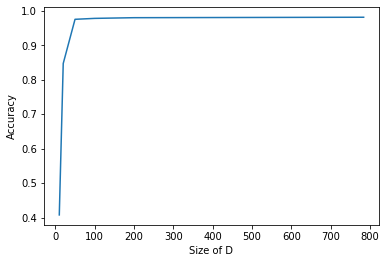

In [22]:
plt.plot(D,acc)
plt.xlabel('Size of D')
plt.ylabel('Accuracy')

Close the first session.

In [23]:
sess_a3_0.close()

# 1.6 Part a)

Setup second network using weights acquired from SVD and D=20.

Hidden layers 1-5 using weights from SVD and bias learned from the first network.

The output layers uses weights and biases from the first network.

Since the weights are already initialized with the learnt weights from the first network, the accuracy starts off at 96% and reaches ~97% because of D=20. 

In [24]:
tf.reset_default_graph()  

#input placeholder
x = tf.placeholder(tf.float32, [None,784])

#layer 1
u1_1 = tf.Variable(u1[:,:20])
v_hat1 = tf.Variable(tf.multiply(s1[:20], v1[:,:20])) 
h1_2 = tf.nn.relu(tf.matmul(x, tf.matmul(u1_1,tf.transpose(v_hat1))) + b1_orig)

#layer 2
u2_1 = tf.Variable(u2[:,:20])
v_hat2 = tf.Variable(tf.multiply(s2[:20], v2[:,:20]))
h2_2 = tf.nn.relu(tf.matmul(h1_2, tf.matmul(u2_1,tf.transpose(v_hat2))) + b2_orig)

#layer 3
u3_1 = tf.Variable(u3[:,:20])
v_hat3 = tf.Variable(tf.multiply(s3[:20], v3[:,:20])) 
h3_2 = tf.nn.relu(tf.matmul(h2_2, tf.matmul(u3_1,tf.transpose(v_hat3))) + b3_orig)

#layer 4
u4_1 = tf.Variable(u4[:,:20])
v_hat4 = tf.Variable(tf.multiply(s4[:20], v4[:,:20])) 
h4_2 = tf.nn.relu(tf.matmul(h3_2, tf.matmul(u4_1,tf.transpose(v_hat4))) + b4_orig)

#layer 5
u5_1 = tf.Variable(u5[:,:20])
v_hat5 = tf.Variable(tf.multiply(s5[:20], v5[:,:20])) 
h5_2 = tf.nn.relu(tf.matmul(h4_2, tf.matmul(u5_1,tf.transpose(v_hat5))) + b5_orig)

#output layer 
y = tf.matmul(h5_2, w6_orig) + b6_orig
y_ = tf.placeholder(tf.int64, [None,10])


# Define loss and optimizer
cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_, logits=y)
train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)
loss_log = []

#intialize tensorflow global variables
init = tf.global_variables_initializer()

#number of epochs, breaks when accuracy reaches 98
epochs=50

#run new network
sess_a3_1 = tf.Session()
sess_a3_1.run(init)


#batch size
batches=int(len(mnist.train.labels)/1000)
epoch_plot=[]
#train model
for epoch in range(epochs):
    epoch_plot.append(epoch)
    print("Epoch: ",epoch)
    for _ in range(batches):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        loss,_ = sess_a3_1.run([cross_entropy,train_step], feed_dict={x: batch_xs, y_: batch_ys})
    loss_log.append(loss)
    correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_result = sess_a3_1.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels})
    print("accucracy is",accuracy_result*100)
    print("Loss:",loss)

Epoch:  0
accucracy is 96.35999798774719
Loss: 0.13106595
Epoch:  1
accucracy is 96.78999781608582
Loss: 0.07071133
Epoch:  2
accucracy is 96.88000082969666
Loss: 0.06326151
Epoch:  3
accucracy is 96.97999954223633
Loss: 0.113481544
Epoch:  4
accucracy is 97.26999998092651
Loss: 0.14831045
Epoch:  5
accucracy is 97.11999893188477
Loss: 0.09478518
Epoch:  6
accucracy is 97.07000255584717
Loss: 0.17179197
Epoch:  7
accucracy is 97.18000292778015
Loss: 0.011497281
Epoch:  8
accucracy is 97.26999998092651
Loss: 0.11837897
Epoch:  9
accucracy is 97.2100019454956
Loss: 0.0877135
Epoch:  10
accucracy is 97.32000231742859
Loss: 0.062031258
Epoch:  11
accucracy is 97.24000096321106
Loss: 0.13074447
Epoch:  12
accucracy is 97.29999899864197
Loss: 0.12794489
Epoch:  13
accucracy is 97.3800003528595
Loss: 0.026732272
Epoch:  14
accucracy is 97.35999703407288
Loss: 0.08853692
Epoch:  15
accucracy is 97.32999801635742
Loss: 0.05002929
Epoch:  16
accucracy is 97.3800003528595
Loss: 0.06619106
Epoch: 

Close second session.

In [25]:
sess_a3_1.close()